## Observations and Insights 

In [1]:
%matplotlib notebook

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata,on ="Mouse ID",how='outer')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [66]:
# Checking the number of mice.
mice_count = combined_data['Mouse ID'].value_counts()
mice_count=len(mice_count)
mice_count

249

In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID = pd.DataFrame(duplicate_mice)
duplicate_ID

,0
0,g989


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [70]:
# Checking the number of mice in the clean DataFrame.
clean_mice=cleaned_df["Mouse ID"].value_counts()
total_mice_df=len(clean_mice)
total_mice_df

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mouse_mean = cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mouse_median = cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mouse_variance = cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mouse_std = cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mouse_sem = cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

sum_t = pd.DataFrame({"Mean": mouse_mean, "Median":mouse_median, "Variance":mouse_variance, "Standard Deviation": mouse_std, "SEM": mouse_sem})
sum_t

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

single_df = cleaned_df.groupby('Drug Regimen')
sum_t2 = single_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sum_t2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


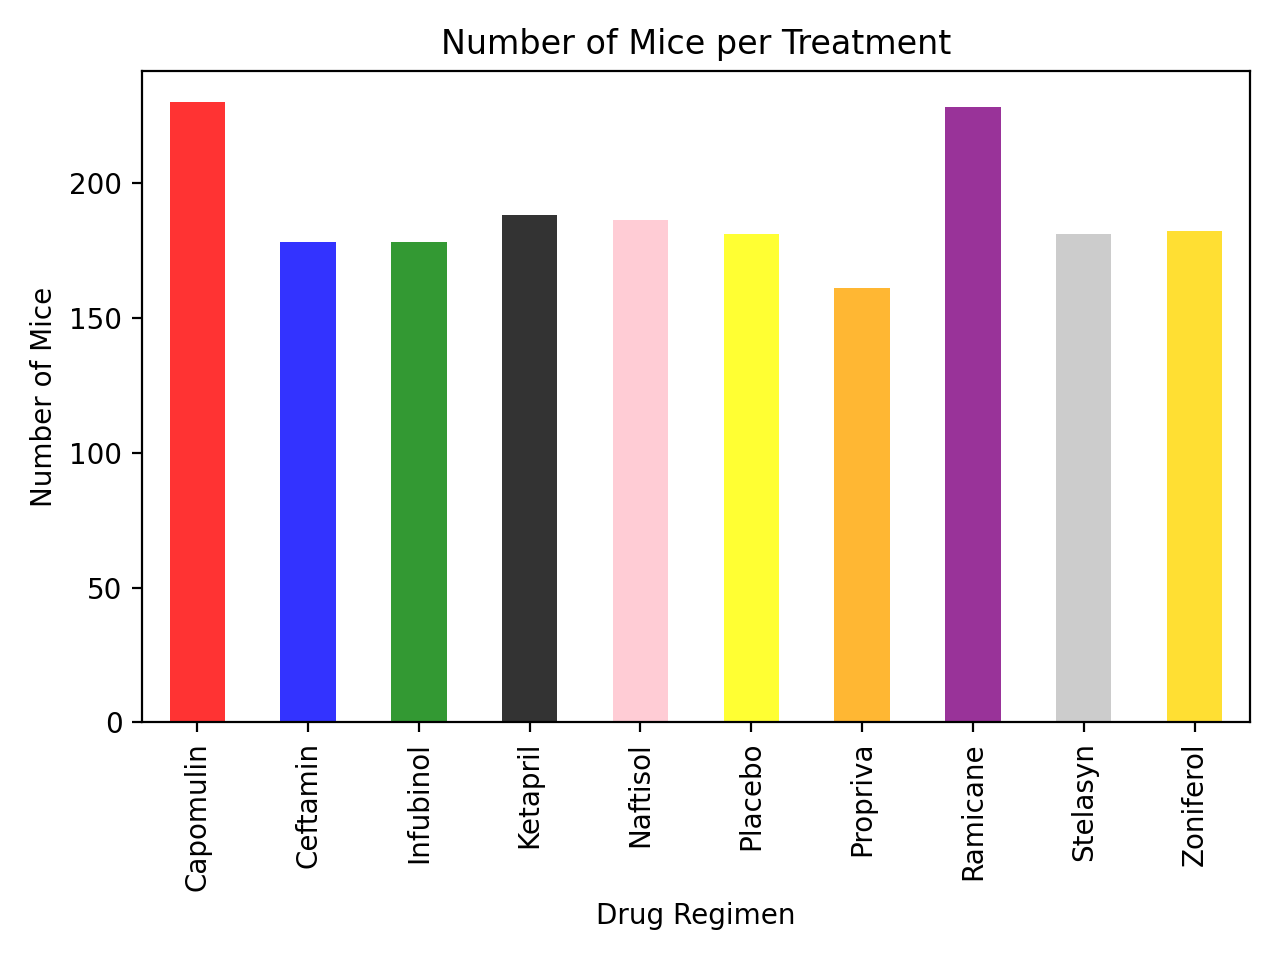

In [91]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_bar = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_bm = mouse_bar.plot.bar(color=['r','b','g','black','pink','yellow','orange','purple','silver','gold'], alpha=0.8)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


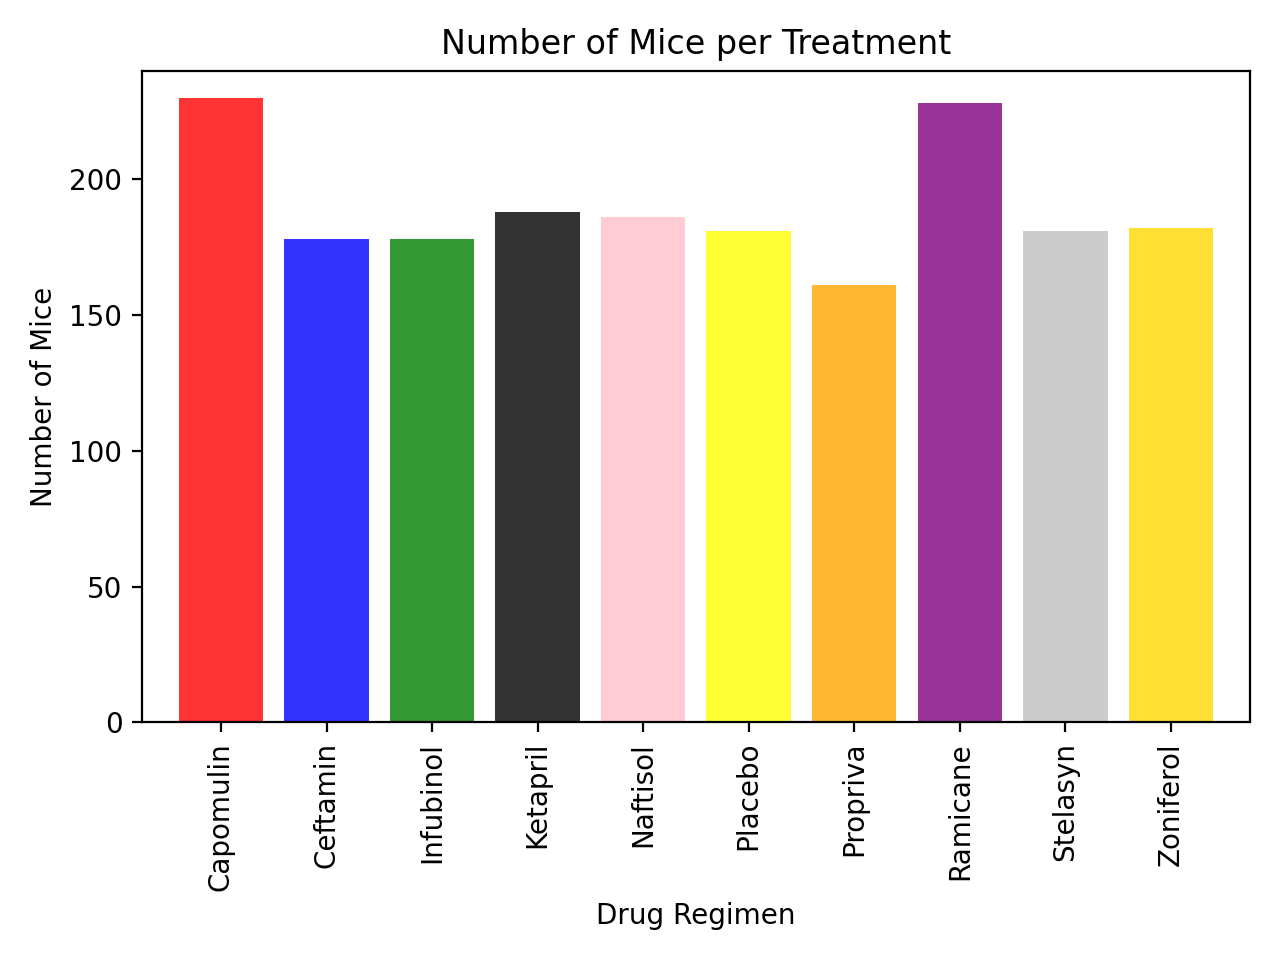

In [92]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
new_mb = mouse_bar.tolist()

x_axis = np.arange(len(mouse_bar))
plt.bar(x_axis, new_mb, color=['r','b','g','black','pink','yellow','orange','purple','silver','gold'], alpha=0.80, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(new_mb)+10)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.show()

        Total Count  Percentage of Sex
Sex                                   
Female          124          49.799197
Male            125          50.200803


<IPython.core.display.Javascript object>


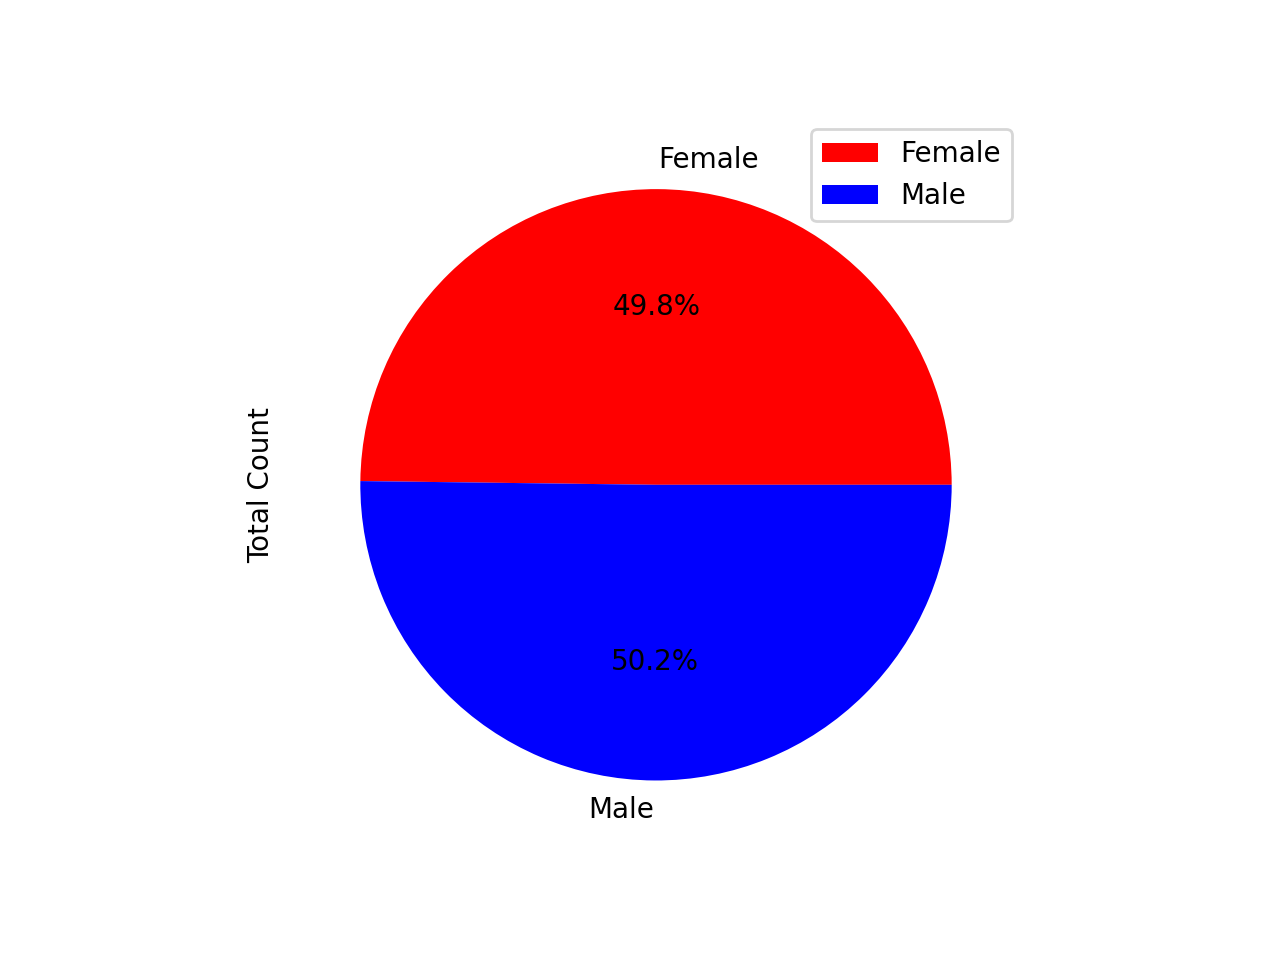

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_pie = combined_data.groupby(["Mouse ID","Sex"])

mouse_gender = pd.DataFrame(mouse_pie.size())

mouse_gd = pd.DataFrame(mouse_gender.groupby(["Sex"]).count())
mouse_gd.columns = ["Total Count"]

mouse_gd["Percentage of Sex"] = (100*(mouse_gd["Total Count"]/mouse_gd["Total Count"].sum()))
mouse_gd["Percentage of Sex"] = mouse_gd["Percentage of Sex"]

print(mouse_gd)
pie_plot = mouse_gd.plot.pie(y='Total Count', colors=['r','b'], autopct="%1.1f%%")

<IPython.core.display.Javascript object>


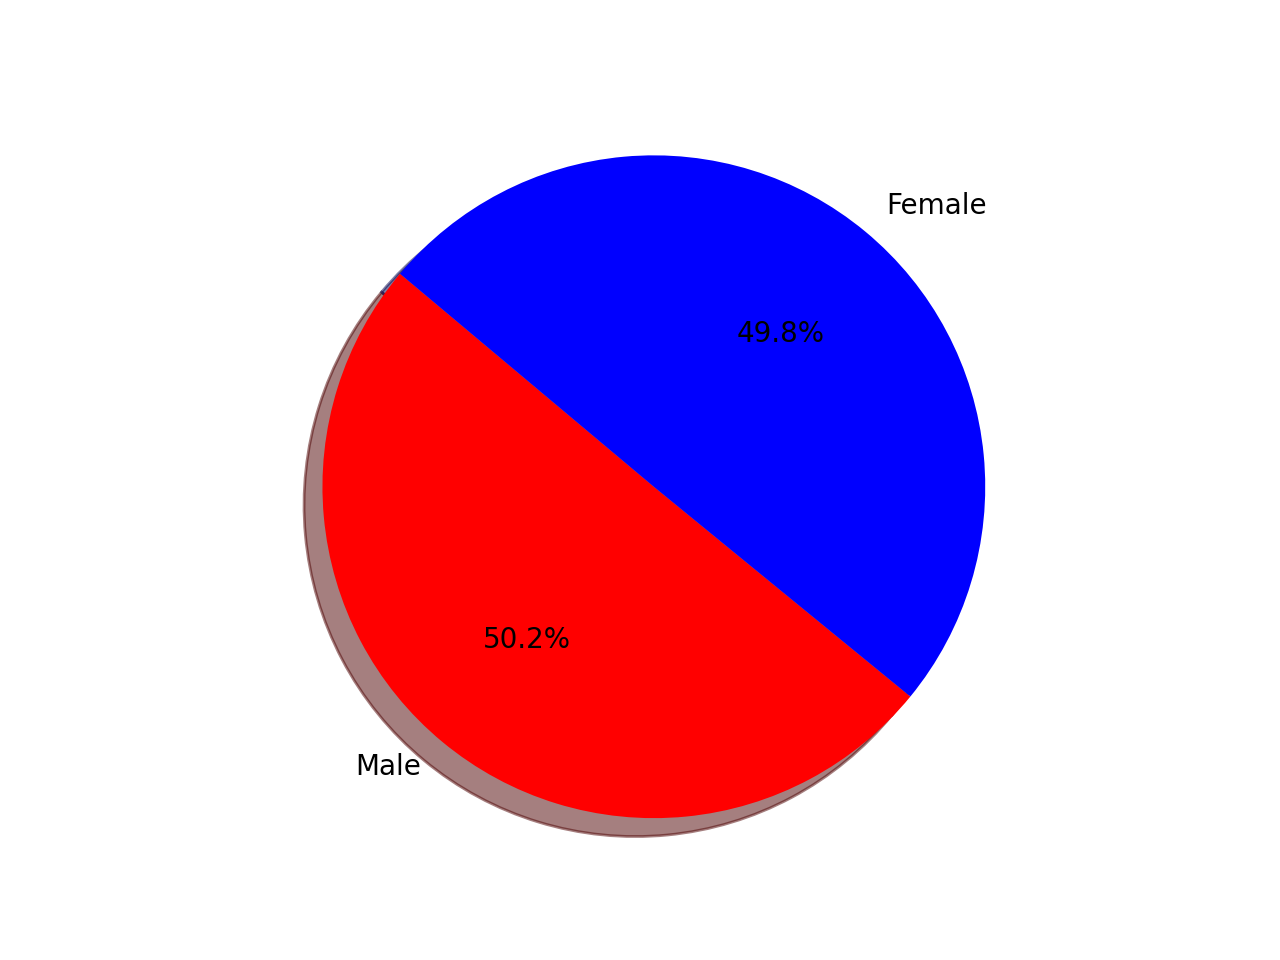

(-1.1092527659968812,
 1.1222566193373384,
 -1.109449931456455,
 1.1211462801337193)

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [50.200803,49.799197]

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

best_rgm = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_rgm = best_rgm.sort_values(["Timepoint"], ascending=True)
best_rgm

best_rgm_data = best_rgm[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_rgm_data.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.0
1613,Ceftamin,x226,0,45.0
1488,Ceftamin,x581,0,45.0
1478,Ceftamin,a275,0,45.0
1468,Ceftamin,k210,0,45.0


In [135]:
# Put treatments into a list for for loop (and later for plot labels)
best_rgm_list = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_rgm_list.head()

# Create empty list to fill with tumor vol data (for plotting)
best_rgm_df = best_rgm_list.to_frame()
best_rgm_df.head()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220

<IPython.core.display.Javascript object>


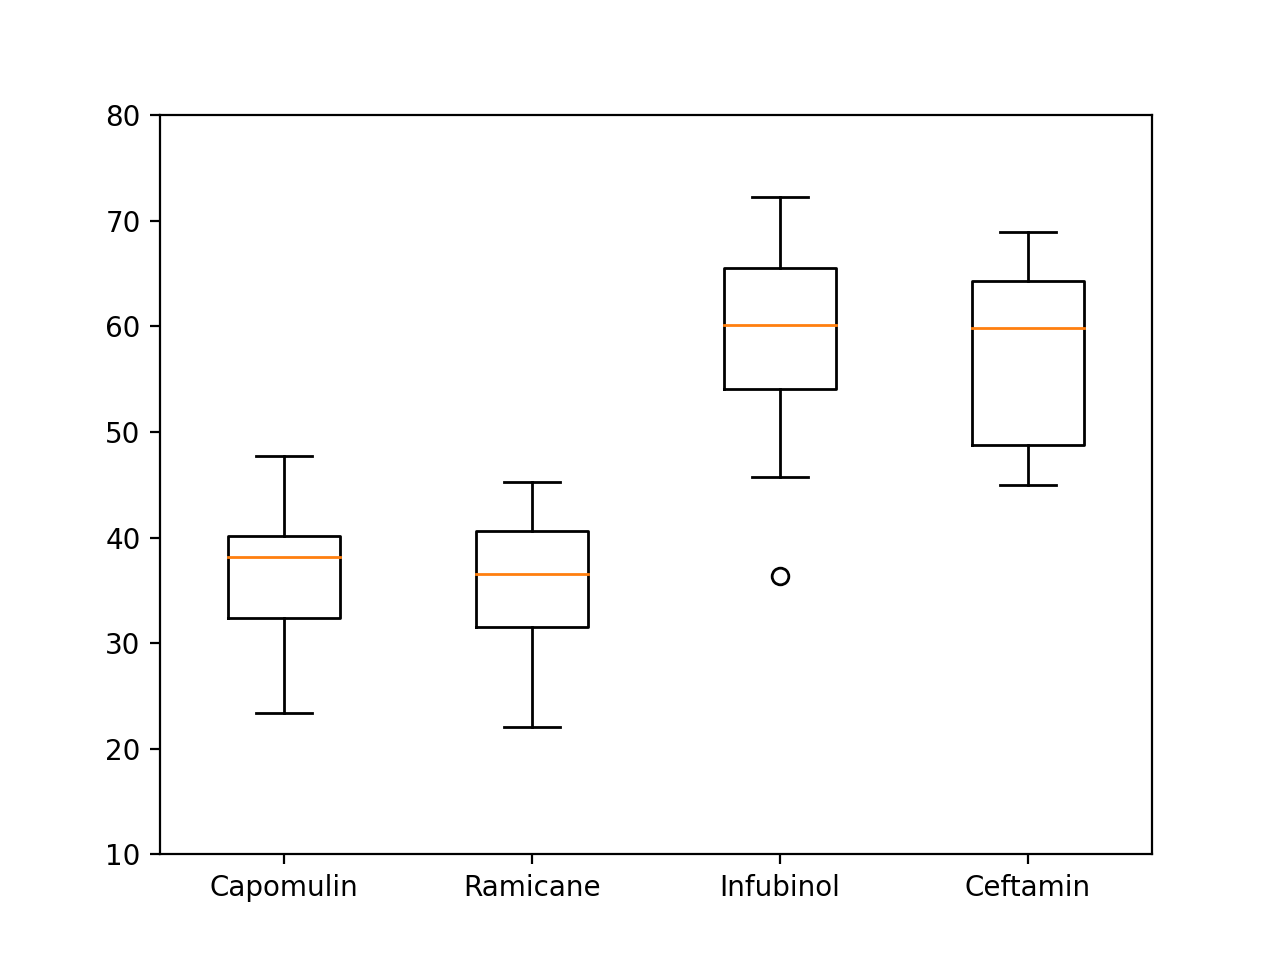

In [134]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

top_regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

final_df = best_rgm_df.reset_index()

tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_regimens)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

plt.boxplot(tumor_vols, labels=top_regimens)
plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


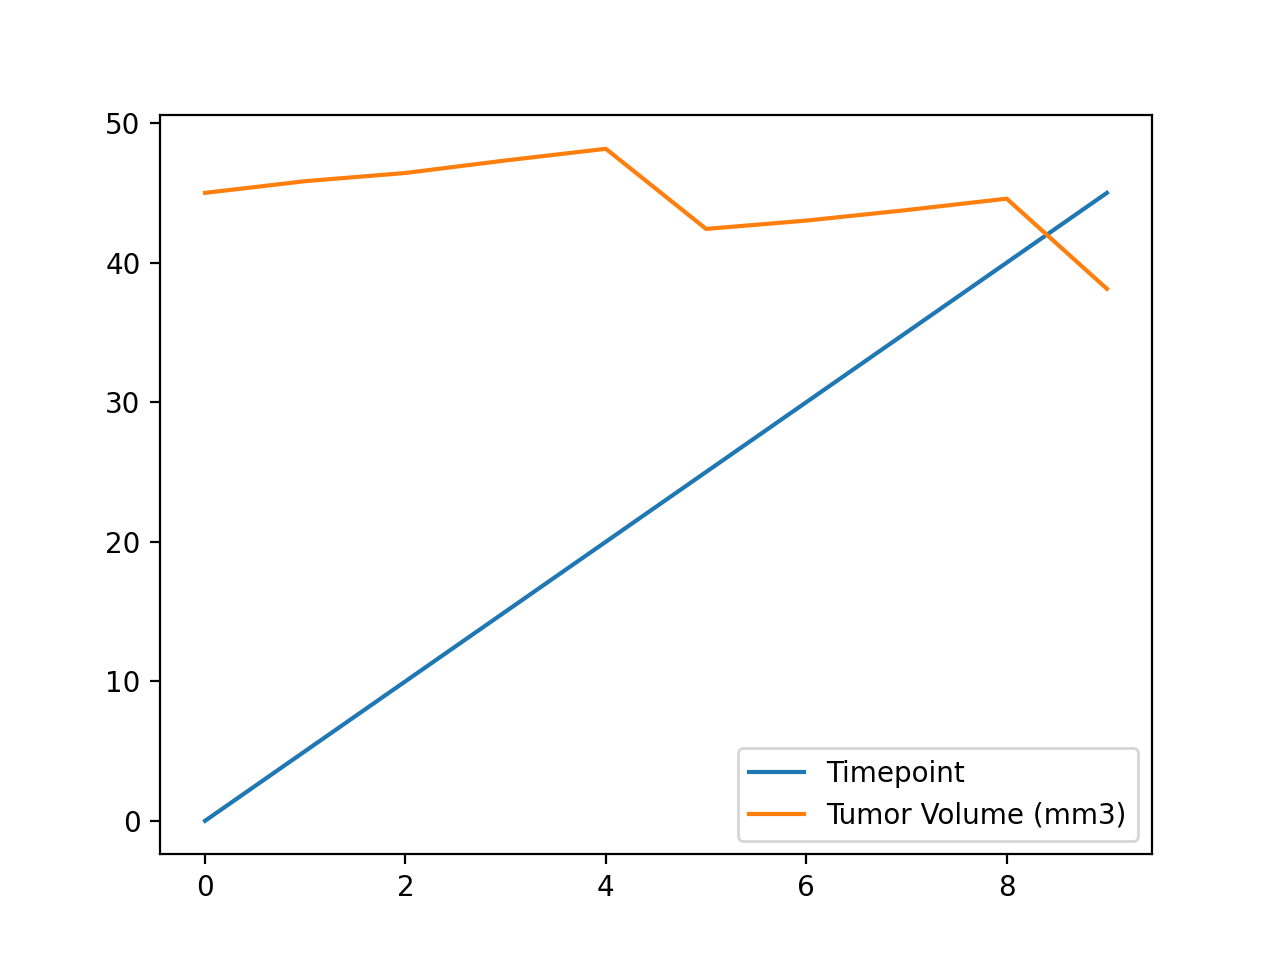

In [138]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumor = combined_data[combined_data["Mouse ID"].isin(["j119"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

In [140]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

## Correlation and Regression

In [144]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_scatter = combined_data[combined_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = top_regimen[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

NameError: name 'top_regimen' is not defined